In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Read in csv file. 
# using sep because of whitespace in column names, Skipping first 6 rows
df = pd.read_csv("2021_01_22_202641_PowerMaster_ShockVibe.csv",sep=r'\s*,\s*', engine='python',skiprows = 6)

def clean_data(df):
    #Removing last column because it has NA values
    df.drop(df.columns[[-1,]], axis=1, inplace=True)
    #print(df.isnull().sum()) - This is for checking
    #df.info() - for checking
    # To Do: remove NaN's
    df.dropna(inplace=True)
    #print(df) - testing
    #df.info() - testing
    #Checking if all NaN's are removed. 
    #df.isnull().sum() - testing
    #df['Date-Time'] - testing
    # Converting 'Date-Time' Col to a datetime object. 
    df['Date-Time'] = pd.to_datetime(df['Date-Time'], format = "%Y/%m/%d %H:%M:%S")
    # Set date-time as index - this is to make it easier to .loc or .iloc
    df = df.set_index(['Date-Time'])
    return df
clean_df = clean_data(df)

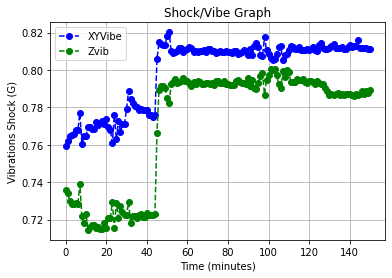

In [23]:
start_time = '9:44:00'
end_time = '11:00:00'
start_date = '2021/01/21'
end_date = '2021/01/21'

# Parameters - cleaned data frame, start date, start time, end date, end time
def graph_data(clean_df,start_date,start_time,end_date,end_time):
    # This is grabbing the rows from selected range of dates and time
    # Have to use sort_index() b/c if not, then it raises an error about future deprecation
    time_chosen_df = clean_df.sort_index().loc[start_date:end_date].between_time(start_time,end_time)
   
    # matplotlib graphing
    %matplotlib inline

    # 150 is maximum amount of minutes needed within the time period.

    # Graph attributes
    x_ticks = np.arange(0,151,20)
    plt.xticks(x_ticks)
    plt.title('Shock/Vibe Graph')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Vibrations Shock (G)')
    plt.grid(True)

    # XYVibe
    xyvibe = time_chosen_df['XYVibe'].values
    plt.plot(xyvibe,'bo--', label='XYVibe')

    # Zvib
    zvib = time_chosen_df['ZVib'].values
    plt.plot(zvib,'go--',label='Zvib')

    plt.legend()
    plt.show()
    

graph_data( clean_df,start_date,start_time,end_date,end_time)



In [ ]:
#Checking if all NaN's are removed. 
df.isnull().sum()
df['Date-Time']